<img src="./assets/img/teclab_logo.png" alt="Teclab logo" width="170">

**Author**: Hector Vergara ([LinkedIn](https://www.linkedin.com/in/hector-vergara/))

**Repository**: [ml_clasificacion_regresion](https://github.com/hhvergara/ml_clasificacion_regresion/)

**Python Notebook**: [API2.ipynb](https://github.com/hhvergara/ml_clasificacion_regresion/blob/main/API1.ipynb)

----

# API 2:

### Situación
Sin duda es un buen comienzo el procesamiento de datos realizados al
dataset “Ames Housing Dataset”.
Durante la mañana del próximo lunes serán
revisados los resultados iniciales del procesamiento de datos que usted
realizó.
En la junta se precisa avanzar con el modelo de regresión lineal.

Para avanzar en esta tarea, se pide cuantificar los datos nan ordenando de
mayor a menor las variables que contienen valores.

Luego se pide crear una función y ejecutarla de modo de eliminar los datos
de las columnas detectadas.
Identificados los datos nan y null, se requiere eliminar dicha data desde el
data frame.

Con el data frame limpio se pide dividir el conjunto de datos df_train y df_test
con un test size 0.2 y un random state 42.

Cargar el modelo de regresión lineal. Luego, usando las variables X_train e
Y_train, procediendo a calcular el precio de las variables. Se requiere print
con el valor de la predicción y el valor real de las viviendas.
Finalmente, se pide estimar el valor del modelo de regresión mediante MSE.

## Consignas
Se solicita diseñar un modelo de regresión lineal usando la variable
objetivo SalePrice.

In [320]:
import os
import numpy as np
import pandas as pd
from pathlib import Path
from scipy.stats import zscore
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import cross_val_score, KFold


__version__ = '0.0.1'
__email__ = 'hhvservice@gmail.com'
__author__ = 'Hector Vergara'
__annotations__ = 'https://www.linkedin.com/in/hector-vergara/'
__base_dir__ = Path().absolute()
__data_dir__ = os.path.join(__base_dir__, 'data')
filename_data = os.path.join(__data_dir__, 'AmesHousing.csv')
printing = lambda text: print("\033[92m" + text + "\033[0m")

In [321]:
# Load data from kaggle dataset
# Dataset Source: https://www.kaggle.com/datasets/shashanknecrothapa/ames-housing-dataset
df = pd.read_csv(filename_data)
df.head(20)

,Order,PID,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,...,Pool Area,Pool QC,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type,Sale Condition,SalePrice
0,1,526301100,20,RL,141.0,31770,Pave,NaN,IR1,Lvl,...,0,NaN,NaN,NaN,0,5,2010,WD,Normal,215000
1,2,526350040,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,...,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal,105000
2,3,526351010,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,...,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal,172000
3,4,526353030,20,RL,93.0,11160,Pave,NaN,Reg,Lvl,...,0,NaN,NaN,NaN,0,4,2010,WD,Normal,244000
4,5,527105010,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,...,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal,189900
5,6,527105030,60,RL,78.0,9978,Pave,NaN,IR1,Lvl,...,0,NaN,NaN,NaN,0,6,2010,WD,Normal,195500
6,7,527127150,120,RL,41.0,4920,Pave,NaN,Reg,Lvl,...,0,NaN,NaN,NaN,0,4,2010,WD,Normal,213500
7,8,527145080,120,RL,43.0,5005,Pave,NaN,IR1,HLS,...,0,NaN,NaN,NaN,0,1,2010,WD,Normal,191500
8,9,527146030,120,RL,39.0,5389,Pave,NaN,IR1,Lvl,...,0,NaN,NaN,NaN,0,3,2010,WD,Normal,236500
9,10,527162130,60,RL,60.0,7500,Pave,NaN,Reg,Lvl,...,0,NaN,NaN,NaN,0,6,2010,WD,Normal,189000


In [322]:
# Show the number of missing values of the columns:
pd.set_option('display.max_rows', None)
printing("Dataframe shape: " + str(df.shape))
df.isnull().sum().sort_values(ascending=False)

Dataframe shape: (2930, 82)


Pool QC            2917
Misc Feature       2824
Alley              2732
Fence              2358
Mas Vnr Type       1775
Fireplace Qu       1422
Lot Frontage        490
Garage Qual         159
Garage Yr Blt       159
Garage Cond         159
Garage Finish       159
Garage Type         157
Bsmt Exposure        83
BsmtFin Type 2       81
Bsmt Qual            80
Bsmt Cond            80
BsmtFin Type 1       80
Mas Vnr Area         23
Bsmt Full Bath        2
Bsmt Half Bath        2
Total Bsmt SF         1
BsmtFin SF 1          1
BsmtFin SF 2          1
Garage Area           1
Garage Cars           1
Bsmt Unf SF           1
Electrical            1
Lot Shape             0
Street                0
Lot Area              0
MS SubClass           0
MS Zoning             0
Order                 0
PID                   0
House Style           0
Bldg Type             0
Condition 2           0
Condition 1           0
Neighborhood          0
Land Slope            0
Lot Config            0
Utilities       

In [323]:
# Now we will check the percentage of NaN values in each column:

# 1. Counting NAN values from dataset:
nan_count = df.apply(lambda col: col.isin([np.nan]).sum())

# 2. Calculate the percentage of NaN values in each column:
nan_percent = nan_count / len(df)

# 3. creating a summary of columns with NaN values:
nan_summary = nan_percent[nan_percent > 0.5].sort_values(ascending=False)

print("Summary of columns with more than 50% of NAN values:")
print(nan_summary)


Summary of columns with more than 50% of NAN values:
Pool QC         0.995563
Misc Feature    0.963823
Alley           0.932423
Fence           0.804778
Mas Vnr Type    0.605802
dtype: float64


In [324]:
# Creating a function to clean the dataframe from NAN and None values:

def clean_dataframe(df: pd.DataFrame, threshold: float = 0.5) -> pd.DataFrame:
    '''
        clean dataframe: delete columns with more than _threshold_ of missing values

        :param df: dataframe to clean

        :param threshold: threshold for the percentage of missing values (more than 50% by default)
    '''
    # 1. Calculate the percentage of null values in each column
    null_percent = df.isnull().mean()

    # 2. Filtering columns with more than threshold null values
    cols_to_drop = null_percent[null_percent > threshold]

    # 3. Show the columns to be dropped
    print(f"Columns affected with more than {threshold * 100}% of missing values:")
    print(cols_to_drop.sort_values(ascending=False))
    clean_df = df.drop(cols_to_drop.index, axis=1)
    return clean_df

clean_df = clean_dataframe(df, threshold=0.5)
clean_df.head(20)

Columns affected with more than 50.0% of missing values:
Pool QC         0.995563
Misc Feature    0.963823
Alley           0.932423
Fence           0.804778
Mas Vnr Type    0.605802
dtype: float64


,Order,PID,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Lot Shape,Land Contour,Utilities,...,Enclosed Porch,3Ssn Porch,Screen Porch,Pool Area,Misc Val,Mo Sold,Yr Sold,Sale Type,Sale Condition,SalePrice
0,1,526301100,20,RL,141.0,31770,Pave,IR1,Lvl,AllPub,...,0,0,0,0,0,5,2010,WD,Normal,215000
1,2,526350040,20,RH,80.0,11622,Pave,Reg,Lvl,AllPub,...,0,0,120,0,0,6,2010,WD,Normal,105000
2,3,526351010,20,RL,81.0,14267,Pave,IR1,Lvl,AllPub,...,0,0,0,0,12500,6,2010,WD,Normal,172000
3,4,526353030,20,RL,93.0,11160,Pave,Reg,Lvl,AllPub,...,0,0,0,0,0,4,2010,WD,Normal,244000
4,5,527105010,60,RL,74.0,13830,Pave,IR1,Lvl,AllPub,...,0,0,0,0,0,3,2010,WD,Normal,189900
5,6,527105030,60,RL,78.0,9978,Pave,IR1,Lvl,AllPub,...,0,0,0,0,0,6,2010,WD,Normal,195500
6,7,527127150,120,RL,41.0,4920,Pave,Reg,Lvl,AllPub,...,170,0,0,0,0,4,2010,WD,Normal,213500
7,8,527145080,120,RL,43.0,5005,Pave,IR1,HLS,AllPub,...,0,0,144,0,0,1,2010,WD,Normal,191500
8,9,527146030,120,RL,39.0,5389,Pave,IR1,Lvl,AllPub,...,0,0,0,0,0,3,2010,WD,Normal,236500
9,10,527162130,60,RL,60.0,7500,Pave,Reg,Lvl,AllPub,...,0,0,0,0,0,6,2010,WD,Normal,189000


In [325]:
# Creating a list of categorical and continuous columns
categorical_data_cols, continuous_data_cols = [], []
[
    categorical_data_cols.append(column)
    if clean_df[column].dtypes == 'O'
    else continuous_data_cols.append(column) for column in clean_df.columns
]
print(f"""
Continuous Data columns:\n🔹 {'\n🔹 '.join(continuous_data_cols)}
Categorical Data columns:\n🔸 {'\n🔸 '.join(categorical_data_cols)}
""")


Continuous Data columns:
🔹 Order
🔹 PID
🔹 MS SubClass
🔹 Lot Frontage
🔹 Lot Area
🔹 Overall Qual
🔹 Overall Cond
🔹 Year Built
🔹 Year Remod/Add
🔹 Mas Vnr Area
🔹 BsmtFin SF 1
🔹 BsmtFin SF 2
🔹 Bsmt Unf SF
🔹 Total Bsmt SF
🔹 1st Flr SF
🔹 2nd Flr SF
🔹 Low Qual Fin SF
🔹 Gr Liv Area
🔹 Bsmt Full Bath
🔹 Bsmt Half Bath
🔹 Full Bath
🔹 Half Bath
🔹 Bedroom AbvGr
🔹 Kitchen AbvGr
🔹 TotRms AbvGrd
🔹 Fireplaces
🔹 Garage Yr Blt
🔹 Garage Cars
🔹 Garage Area
🔹 Wood Deck SF
🔹 Open Porch SF
🔹 Enclosed Porch
🔹 3Ssn Porch
🔹 Screen Porch
🔹 Pool Area
🔹 Misc Val
🔹 Mo Sold
🔹 Yr Sold
🔹 SalePrice
Categorical Data columns:
🔸 MS Zoning
🔸 Street
🔸 Lot Shape
🔸 Land Contour
🔸 Utilities
🔸 Lot Config
🔸 Land Slope
🔸 Neighborhood
🔸 Condition 1
🔸 Condition 2
🔸 Bldg Type
🔸 House Style
🔸 Roof Style
🔸 Roof Matl
🔸 Exterior 1st
🔸 Exterior 2nd
🔸 Exter Qual
🔸 Exter Cond
🔸 Foundation
🔸 Bsmt Qual
🔸 Bsmt Cond
🔸 Bsmt Exposure
🔸 BsmtFin Type 1
🔸 BsmtFin Type 2
🔸 Heating
🔸 Heating QC
🔸 Central Air
🔸 Electrical
🔸 Kitchen Qual
🔸 Functional
🔸 Fire

In [326]:
# 💡 Inputing missing values in categorical columns with the most frequent value in the column
# and in continuous columns with the median value in the column.

for column in clean_df.columns:
    # Replacing missing values in categorical columns with the most frequent value in the column
    clean_df.update(clean_df[column].fillna(clean_df[column].median()
            if column in continuous_data_cols
            else clean_df[column].mode()[0]
        ))
    # Now, we transform categorical columns into numerical columns using LabelEncoder:
    if column in categorical_data_cols:
        clean_df[column] = LabelEncoder().fit_transform(clean_df[column])

clean_df.isnull().sum().sort_values(ascending=False)

Order              0
PID                0
MS SubClass        0
MS Zoning          0
Lot Frontage       0
Lot Area           0
Street             0
Lot Shape          0
Land Contour       0
Utilities          0
Lot Config         0
Land Slope         0
Neighborhood       0
Condition 1        0
Condition 2        0
Bldg Type          0
House Style        0
Overall Qual       0
Overall Cond       0
Year Built         0
Year Remod/Add     0
Roof Style         0
Roof Matl          0
Exterior 1st       0
Exterior 2nd       0
Mas Vnr Area       0
Exter Qual         0
Exter Cond         0
Foundation         0
Bsmt Qual          0
Bsmt Cond          0
Bsmt Exposure      0
BsmtFin Type 1     0
BsmtFin SF 1       0
BsmtFin Type 2     0
BsmtFin SF 2       0
Bsmt Unf SF        0
Total Bsmt SF      0
Heating            0
Heating QC         0
Central Air        0
Electrical         0
1st Flr SF         0
2nd Flr SF         0
Low Qual Fin SF    0
Gr Liv Area        0
Bsmt Full Bath     0
Bsmt Half Bat

In [327]:
# 💡 Showing the first 10 rows of the cleaned dataframe with missing values filled,
# and categorical columns transformed into numerical columns:
clean_df.head(10)

,Order,PID,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Lot Shape,Land Contour,Utilities,...,Enclosed Porch,3Ssn Porch,Screen Porch,Pool Area,Misc Val,Mo Sold,Yr Sold,Sale Type,Sale Condition,SalePrice
0,1,526301100,20,5,141.0,31770,1,0,3,0,...,0,0,0,0,0,5,2010,9,4,215000
1,2,526350040,20,4,80.0,11622,1,3,3,0,...,0,0,120,0,0,6,2010,9,4,105000
2,3,526351010,20,5,81.0,14267,1,0,3,0,...,0,0,0,0,12500,6,2010,9,4,172000
3,4,526353030,20,5,93.0,11160,1,3,3,0,...,0,0,0,0,0,4,2010,9,4,244000
4,5,527105010,60,5,74.0,13830,1,0,3,0,...,0,0,0,0,0,3,2010,9,4,189900
5,6,527105030,60,5,78.0,9978,1,0,3,0,...,0,0,0,0,0,6,2010,9,4,195500
6,7,527127150,120,5,41.0,4920,1,3,3,0,...,170,0,0,0,0,4,2010,9,4,213500
7,8,527145080,120,5,43.0,5005,1,0,1,0,...,0,0,144,0,0,1,2010,9,4,191500
8,9,527146030,120,5,39.0,5389,1,0,3,0,...,0,0,0,0,0,3,2010,9,4,236500
9,10,527162130,60,5,60.0,7500,1,3,3,0,...,0,0,0,0,0,6,2010,9,4,189000


In [328]:
# 💡 In adition, we will remove the outliers from the dataset using the Z-score method.
def remove_outliers_zscore(df: pd.DataFrame, column: str, threshold: int = 3) -> pd.DataFrame:
    z_scores = zscore(df[column])
    abs_z_scores = np.abs(z_scores)
    return df[abs_z_scores < threshold]
clean_df = remove_outliers_zscore(clean_df, 'SalePrice')


In [329]:
# 💡 Splitting the dataset into training and testing sets:
# Deffining X (all columns except SalePrice) and y (the target column SalePrice):
X = clean_df.drop(columns=['SalePrice'])
y = clean_df['SalePrice']

# Dividing on 20% for test and 42 for random_state.
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

In [330]:
# 💡 Training the LinearRegression model:
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [331]:
# 💡Make the prediction with the test data:
y_pred = model.predict(X_test)

In [332]:
comparison_df = pd.DataFrame({
    'Predicted Price': y_pred[:10],
    'Actual Price': y_test.values[:10]
})
print(comparison_df)

   Predicted Price  Actual Price
0    236221.720150        236000
1    213015.858857        208500
2    200836.414408        234000
3    178332.742993        160000
4    250704.437289        240000
5    121425.943836        112500
6    207408.097535        193000
7     72601.768068         93900
8    216165.058298        224500
9    298184.026337        302000


In [333]:
# 💡 Now, we create a function to display the metrics of our model, in order to determinate the error:
def get_metrics(y_test: pd.DataFrame, y_pred: pd.DataFrame) -> dict:
    # Metrics:
    mse = mean_squared_error(y_test, y_pred)
    rmse = np.sqrt(mse)
    r2 = r2_score(y_test, y_pred)

    # Avg price and relative error:
    avg_price = y.mean()
    error_pct = (rmse / avg_price) * 100

    # Result summary:
    print(f"📊 Linear Regression model metrics:")
    print(f"➡️  Mean Squared Error (MSE): {mse:,.2f}")
    print(f"➡️  Root Mean Squared Error (RMSE): {rmse:,.2f}")
    print(f"➡️  R² Score: {r2:.4f}")
    print(f"➡️  SalePrice AVG: {avg_price:,.2f}")
    print(f"➡️  Relative AVG Error: {error_pct:.2f}%")
    return {
        'mse': mse,
        'rmse': rmse,
        'r2': r2,
        'avg_price': avg_price,
        'error_pct': error_pct
    }

metrics = get_metrics(y_test, y_pred)


📊 Linear Regression model metrics:
➡️  Mean Squared Error (MSE): 555,898,399.30
➡️  Root Mean Squared Error (RMSE): 23,577.50
➡️  R² Score: 0.8817
➡️  SalePrice AVG: 175,742.45
➡️  Relative AVG Error: 13.42%


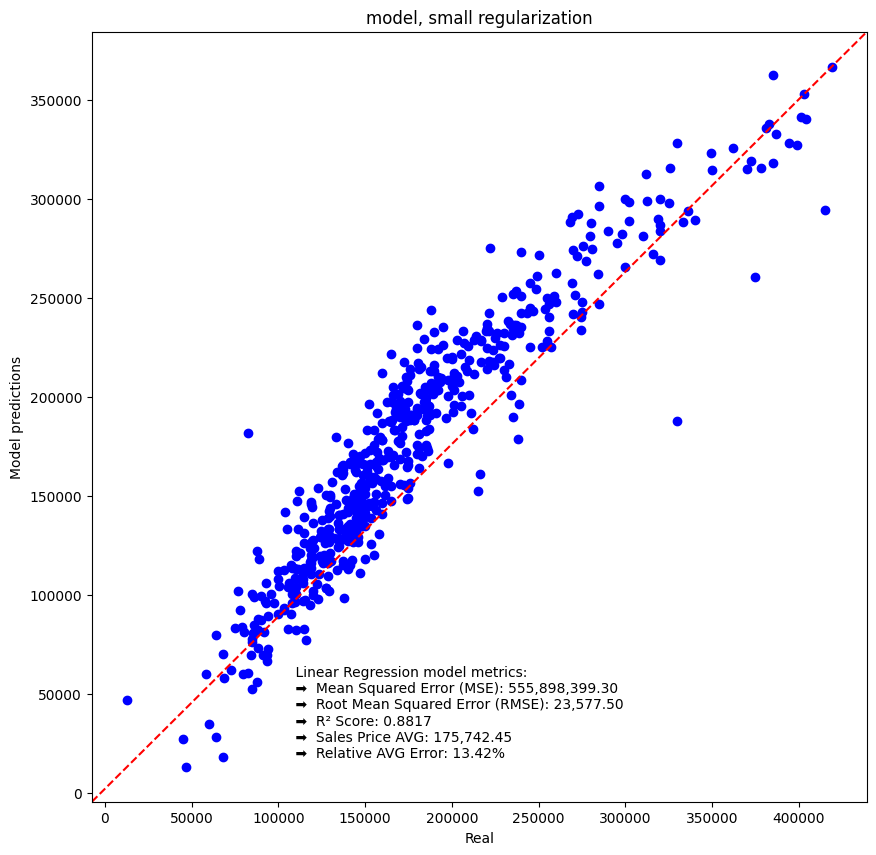

In [334]:
# 💡 Creating a function to plot the comparison between the real data and the prediction:
def plot_regression_line(_y: pd.DataFrame, y_prediction: pd.DataFrame, string_score: str) -> None:
    """
    Function to graph the regression line over the data points.
    Parameters:
    _y: dataframe with test data
    y_prediction: dataframe with predicted data
    string_score: Text to show in the plot
    """
    fig, ax = plt.subplots(figsize=(10, 10))
    plt.scatter(_y, y_prediction,  c="blue")
    ax.plot([0, 1], [0, 1], transform=ax.transAxes, ls="--", c="red")
    plt.text(100000, 10000, string_score)
    plt.title('model, small regularization')
    plt.ylabel('Model predictions')
    plt.xlabel('Real')

string_score = f'''
    Linear Regression model metrics:
    ➡️  Mean Squared Error (MSE): {metrics['mse']:,.2f}
    ➡️  Root Mean Squared Error (RMSE): {metrics['rmse']:,.2f}
    ➡️  R² Score: {metrics['r2']:.4f}
    ➡️  Sales Price AVG: {metrics['avg_price']:,.2f}
    ➡️  Relative AVG Error: {metrics['error_pct']:.2f}%
    '''

plot_regression_line(y_test, y_pred, string_score=string_score)


# ✍️ Conclusión

El modelo de regresión lineal desarrollado a partir del Ames Housing Dataset demuestra una capacidad predictiva sólida, alcanzando un coeficiente de determinación (R²) de 0,8817, lo que indica que aproximadamente el 88% de la variabilidad del precio de venta de las viviendas puede explicarse por las variables seleccionadas.

Además, el error cuadrático medio (MSE) de 555.898.399,30 y su raíz (RMSE) de 23.577,50 se mantienen en niveles aceptables si se considera que el precio promedio de las viviendas en el conjunto de datos es de $175.742,45, con un error relativo promedio de 13,42%.

El proceso completo incluyó:

- Limpieza de datos y eliminación de columnas con más del 50% de valores faltantes.

- Imputación de valores nulos restantes según tipo de variable.

- Codificación de variables categóricas.

- Eliminación de outliers con método de Z-score.

- Entrenamiento y evaluación del modelo lineal sobre una división estratificada del dataset.

Este trabajo constituye una base sólida para iterar con modelos más complejos o integrar técnicas de feature engineering y regularización que mejoren aún más la capacidad predictiva.